# Exercise 4:  Linear Regression

---

## House Prices - Advanced Regression Techniques

#### Price Versus Area

Link: https://www.kaggle.com/c/house-prices-advanced-regression-techniques

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()

In [2]:
houseData = pd.read_csv('train.csv')

Extract the following Numeric variables from the dataset, and store as two new Pandas DataFrames

In [3]:
houseGrLivArea = pd.DataFrame(houseData['GrLivArea'])
houseTotalBsmtSF = pd.DataFrame(houseData['TotalBsmtSF'])
houseGarageArea = pd.DataFrame(houseData['GarageArea'])
houseLotArea = pd.DataFrame(houseData['LotArea'])

houseSalePrice = pd.DataFrame(houseData['SalePrice'])

Plot houseSalePrice against houseGrLivArea using standard jointplot, and note the strong linear relationship.

In [4]:
PriceVArea = pd.concat([houseGrLivArea, houseSalePrice], axis = 1).reindex(houseGrLivArea.index)
PriceVBasement = pd.concat([houseTotalBsmtSF, houseSalePrice], axis = 1).reindex(houseTotalBsmtSF.index)
PriceVGarage = pd.concat([houseGarageArea, houseSalePrice], axis = 1).reindex(houseGarageArea.index)
PriceVLot = pd.concat([houseLotArea, houseSalePrice], axis = 1).reindex(houseLotArea.index)

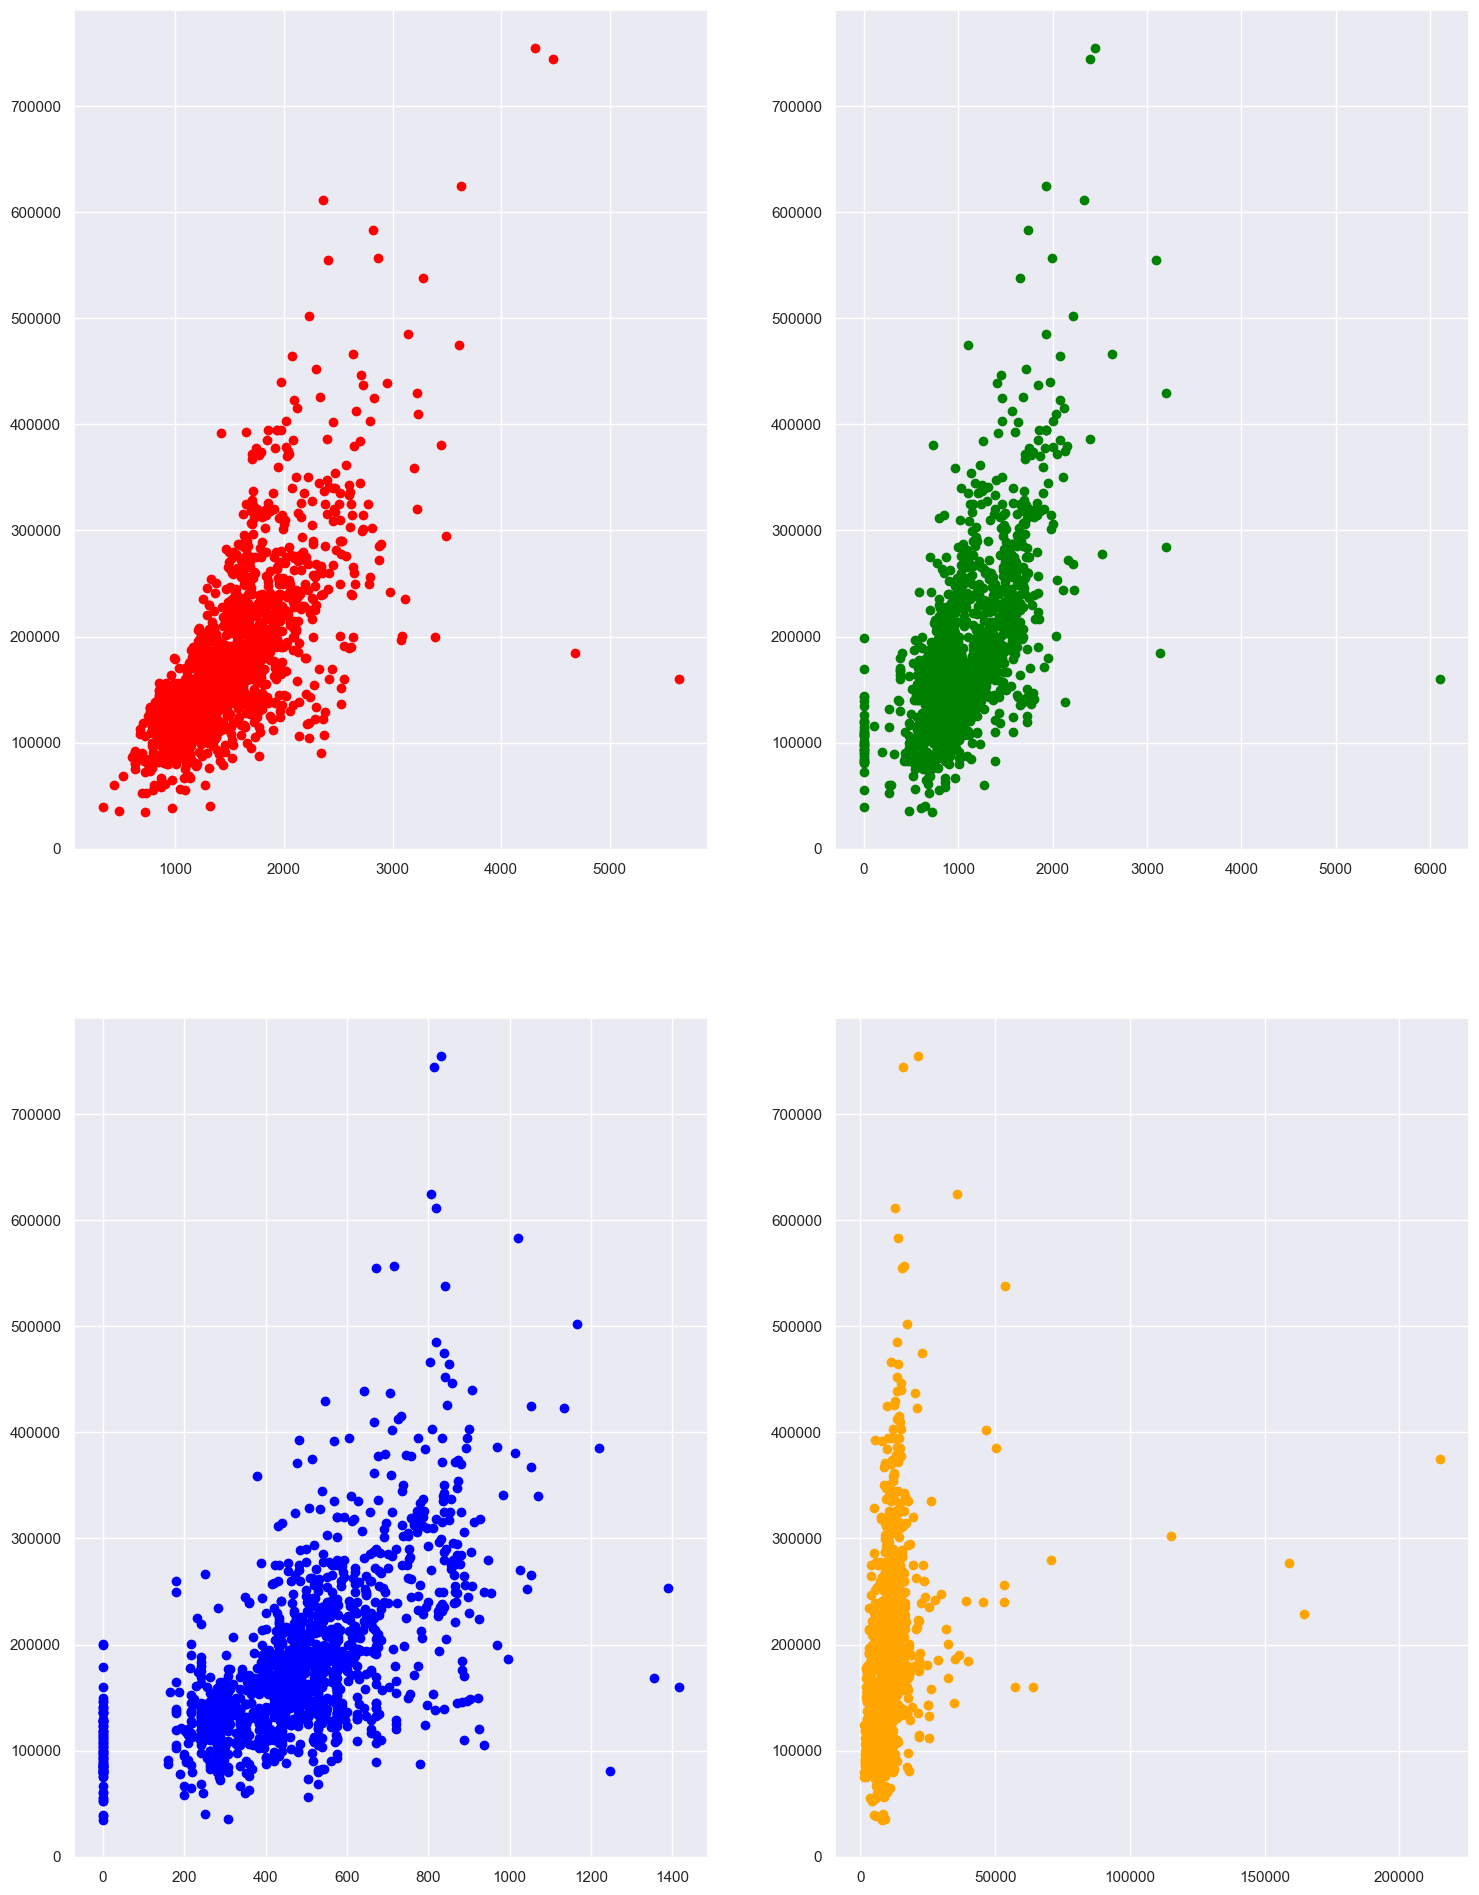

In [5]:
f, axes = plt.subplots(2, 2, figsize=(18, 24))
axes[0][0].scatter(houseGrLivArea, houseSalePrice, color = "red")
axes[0][1].scatter(houseTotalBsmtSF, houseSalePrice, color = "green")
axes[1][0].scatter(houseGarageArea, houseSalePrice, color = "blue")
axes[1][1].scatter(houseLotArea, houseSalePrice, color = "orange")

<Axes: >

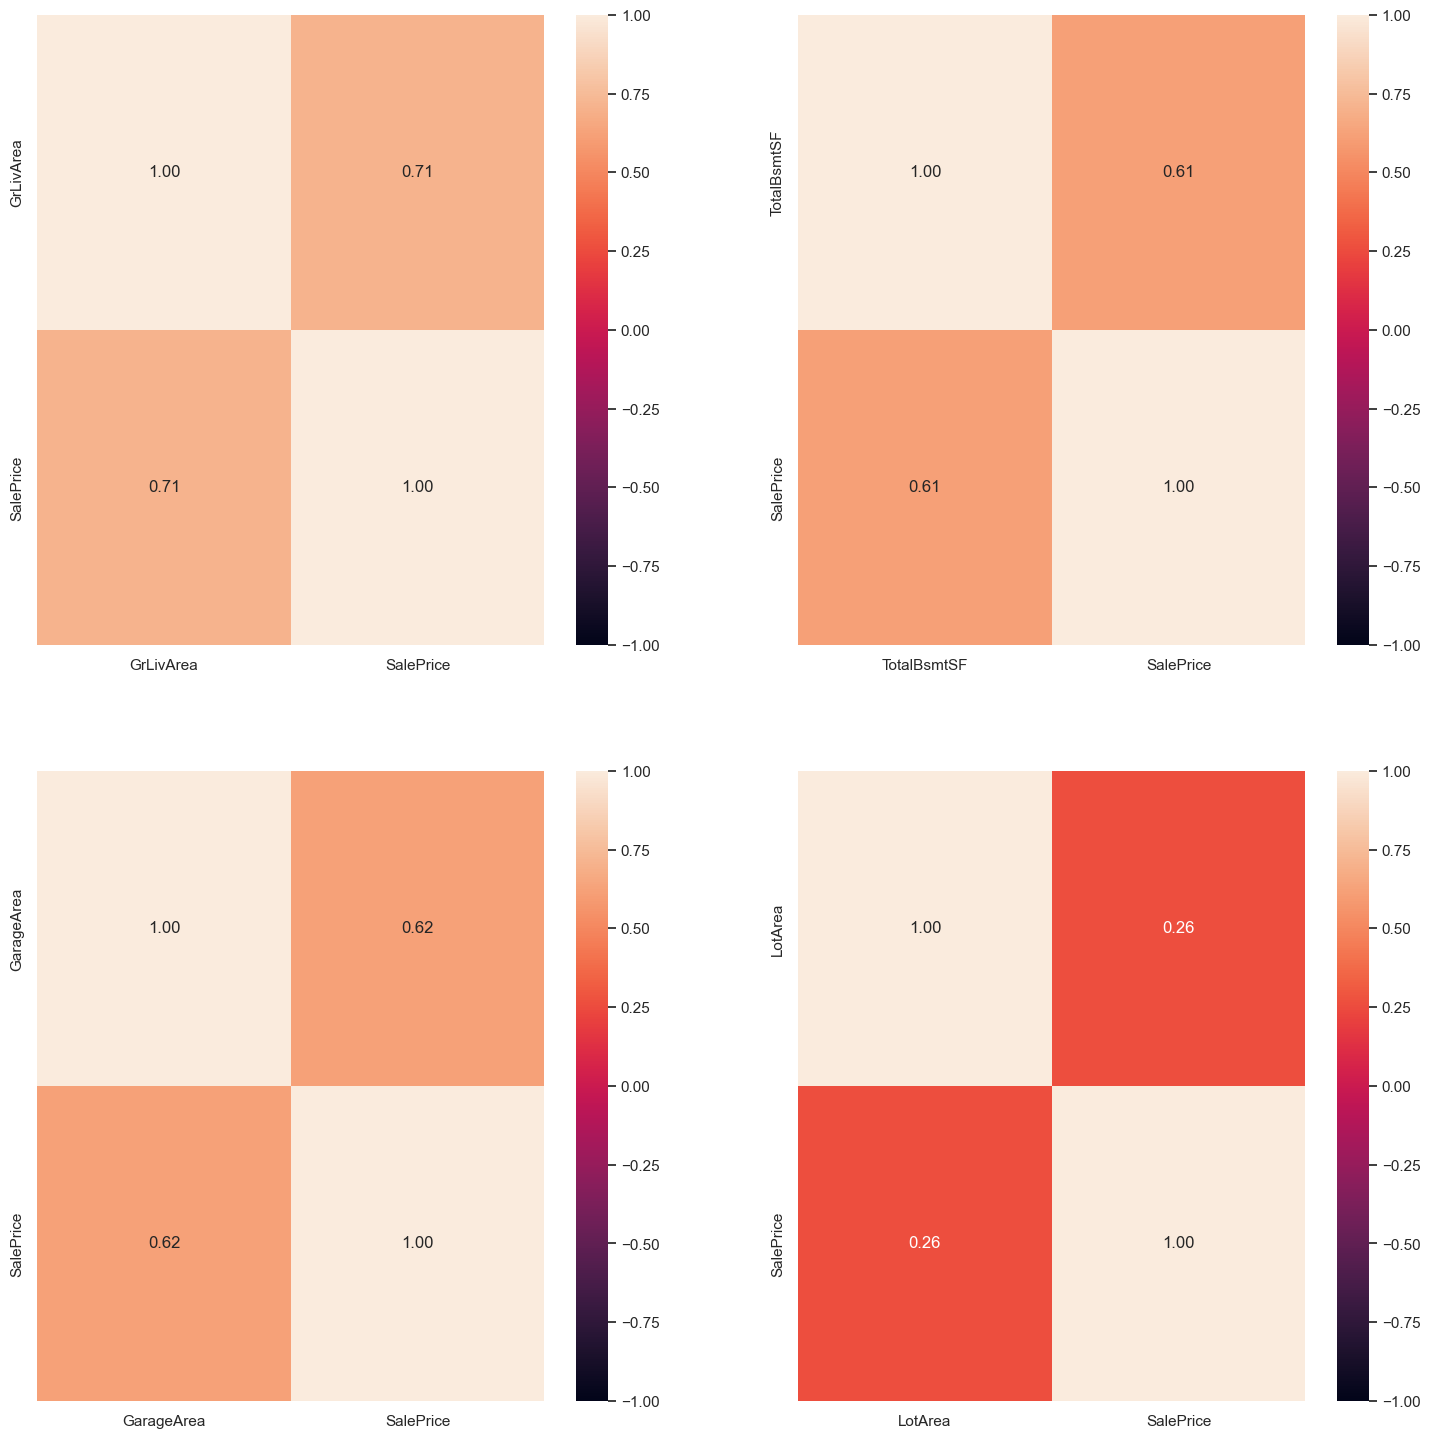

In [6]:
f, axes = plt.subplots(2, 2, figsize=(18, 18))

sb.heatmap(PriceVArea.corr(), vmin = -1, vmax = 1, annot = True, fmt=".2f", ax= axes[0][0])
sb.heatmap(PriceVBasement.corr(), vmin = -1, vmax = 1, annot = True, fmt=".2f", ax= axes[0][1])
sb.heatmap(PriceVGarage.corr(), vmin = -1, vmax = 1, annot = True, fmt=".2f", ax= axes[1][0])
sb.heatmap(PriceVLot.corr(), vmin = -1, vmax = 1, annot = True, fmt=".2f", ax= axes[1][1])

Import Linear Regression model from Scikit-Learn

In [7]:
from sklearn.linear_model import LinearRegression

Partition both datasets houseGrLivArea and houseSalePrice into Train (1100 rows) and Test (360 rows) sets.

In [8]:
houseGrLivArea_train, houseSalePrice_train, houseGrLivArea_test, houseSalePrice_test = pd.DataFrame(houseGrLivArea[:1100]), pd.DataFrame(houseSalePrice[:1100]), pd.DataFrame(houseGrLivArea[-360:]), pd.DataFrame(houseSalePrice[-360:])
houseTotalBsmtSF_train, houseSalePrice_train, houseTotalBsmtSF_test, houseSalePrice_test = pd.DataFrame(houseTotalBsmtSF[:1100]), pd.DataFrame(houseSalePrice[:1100]), pd.DataFrame(houseTotalBsmtSF[-360:]), pd.DataFrame(houseSalePrice[-360:])
houseGarageArea_train, houseSalePrice_train, houseGarageArea_test, houseSalePrice_test = pd.DataFrame(houseGarageArea[:1100]), pd.DataFrame(houseSalePrice[:1100]), pd.DataFrame(houseGarageArea[-360:]), pd.DataFrame(houseSalePrice[-360:])
houseLotArea_train, houseSalePrice_train, houseLotArea_test, houseSalePrice_test = pd.DataFrame(houseLotArea[:1100]), pd.DataFrame(houseSalePrice[:1100]), pd.DataFrame(houseLotArea[-360:]), pd.DataFrame(houseSalePrice[-360:])

print("Price Versus Area")
print("Train Set :", houseGrLivArea_train.shape, houseSalePrice_train.shape)
print("Test Set  :", houseGrLivArea_test.shape, houseSalePrice_test.shape)

print("\nPrice Versus Basement")
print("Train Set :", houseTotalBsmtSF_train.shape, houseSalePrice_train.shape)
print("Test Set  :", houseTotalBsmtSF_test.shape, houseSalePrice_test.shape)

print("\nPrice Versus Garage")
print("Train Set :", houseGarageArea_train.shape, houseSalePrice_train.shape)
print("Test Set  :", houseGarageArea_test.shape, houseSalePrice_test.shape)

print("\nPrice Versus Lot Area")
print("Train Set :", houseLotArea_train.shape, houseSalePrice_train.shape)
print("Test Set  :", houseLotArea_test.shape, houseSalePrice_test.shape)

Price Versus Area
Train Set : (1100, 1) (1100, 1)
Test Set  : (360, 1) (360, 1)

Price Versus Basement
Train Set : (1100, 1) (1100, 1)
Test Set  : (360, 1) (360, 1)

Price Versus Garage
Train Set : (1100, 1) (1100, 1)
Test Set  : (360, 1) (360, 1)

Price Versus Lot Area
Train Set : (1100, 1) (1100, 1)
Test Set  : (360, 1) (360, 1)


Training : Fit a Linear Regression model with X = houseGrLivArea_train and y = houseSalePrice_train

In [9]:
linregPriceVArea = LinearRegression()
linregPriceVArea.fit(houseGrLivArea_train, houseSalePrice_train)

linregPriceVBasement = LinearRegression()
linregPriceVBasement.fit(houseTotalBsmtSF_train, houseSalePrice_train)

linregPriceVGarage = LinearRegression()
linregPriceVGarage.fit(houseGarageArea_train, houseSalePrice_train)

linregPriceVLot = LinearRegression()
linregPriceVLot.fit(houseLotArea_train, houseSalePrice_train)

LinearRegression()

Print the coefficients of the Linear Regression model you just fit.

In [10]:
print("Price Versus Area")
print('Intercept \t: b = ', linregPriceVArea.intercept_)
print('Coefficients \t: a = ', linregPriceVArea.coef_)

print("\nPrice Versus Basement")
print('Intercept \t: b = ', linregPriceVBasement.intercept_)
print('Coefficients \t: a = ', linregPriceVBasement.coef_)

print("\nPrice Versus Garage")
print('Intercept \t: b = ', linregPriceVGarage.intercept_)
print('Coefficients \t: a = ', linregPriceVGarage.coef_)

print("\nPrice Versus Lot Area")
print('Intercept \t: b = ', linregPriceVLot.intercept_)
print('Coefficients \t: a = ', linregPriceVLot.coef_)

Price Versus Area
Intercept 	: b =  [9498.33463562]
Coefficients 	: a =  [[113.88950443]]

Price Versus Basement
Intercept 	: b =  [54361.70161283]
Coefficients 	: a =  [[120.19979559]]

Price Versus Garage
Intercept 	: b =  [67131.98072434]
Coefficients 	: a =  [[241.42776434]]

Price Versus Lot Area
Intercept 	: b =  [160963.95370929]
Coefficients 	: a =  [[1.91881242]]


Plot the Regression line on a Scatterplot of houseGrLivArea_train and houseSalePrice_train using the standard slope-intercept form of straight line.

In [11]:
regline_xArea = houseGrLivArea_train
regline_yArea = linregPriceVArea.intercept_ + linregPriceVArea.coef_ * houseGrLivArea_train

regline_xBasement = houseTotalBsmtSF_train
regline_yBasement = linregPriceVBasement.intercept_ + linregPriceVBasement.coef_ * houseTotalBsmtSF_train

regline_xGarage = houseGarageArea_train
regline_yGarage = linregPriceVGarage.intercept_ + linregPriceVGarage.coef_ * houseGarageArea_train

regline_xLot = houseLotArea_train
regline_yLot = linregPriceVLot.intercept_ + linregPriceVLot.coef_ * houseLotArea_train

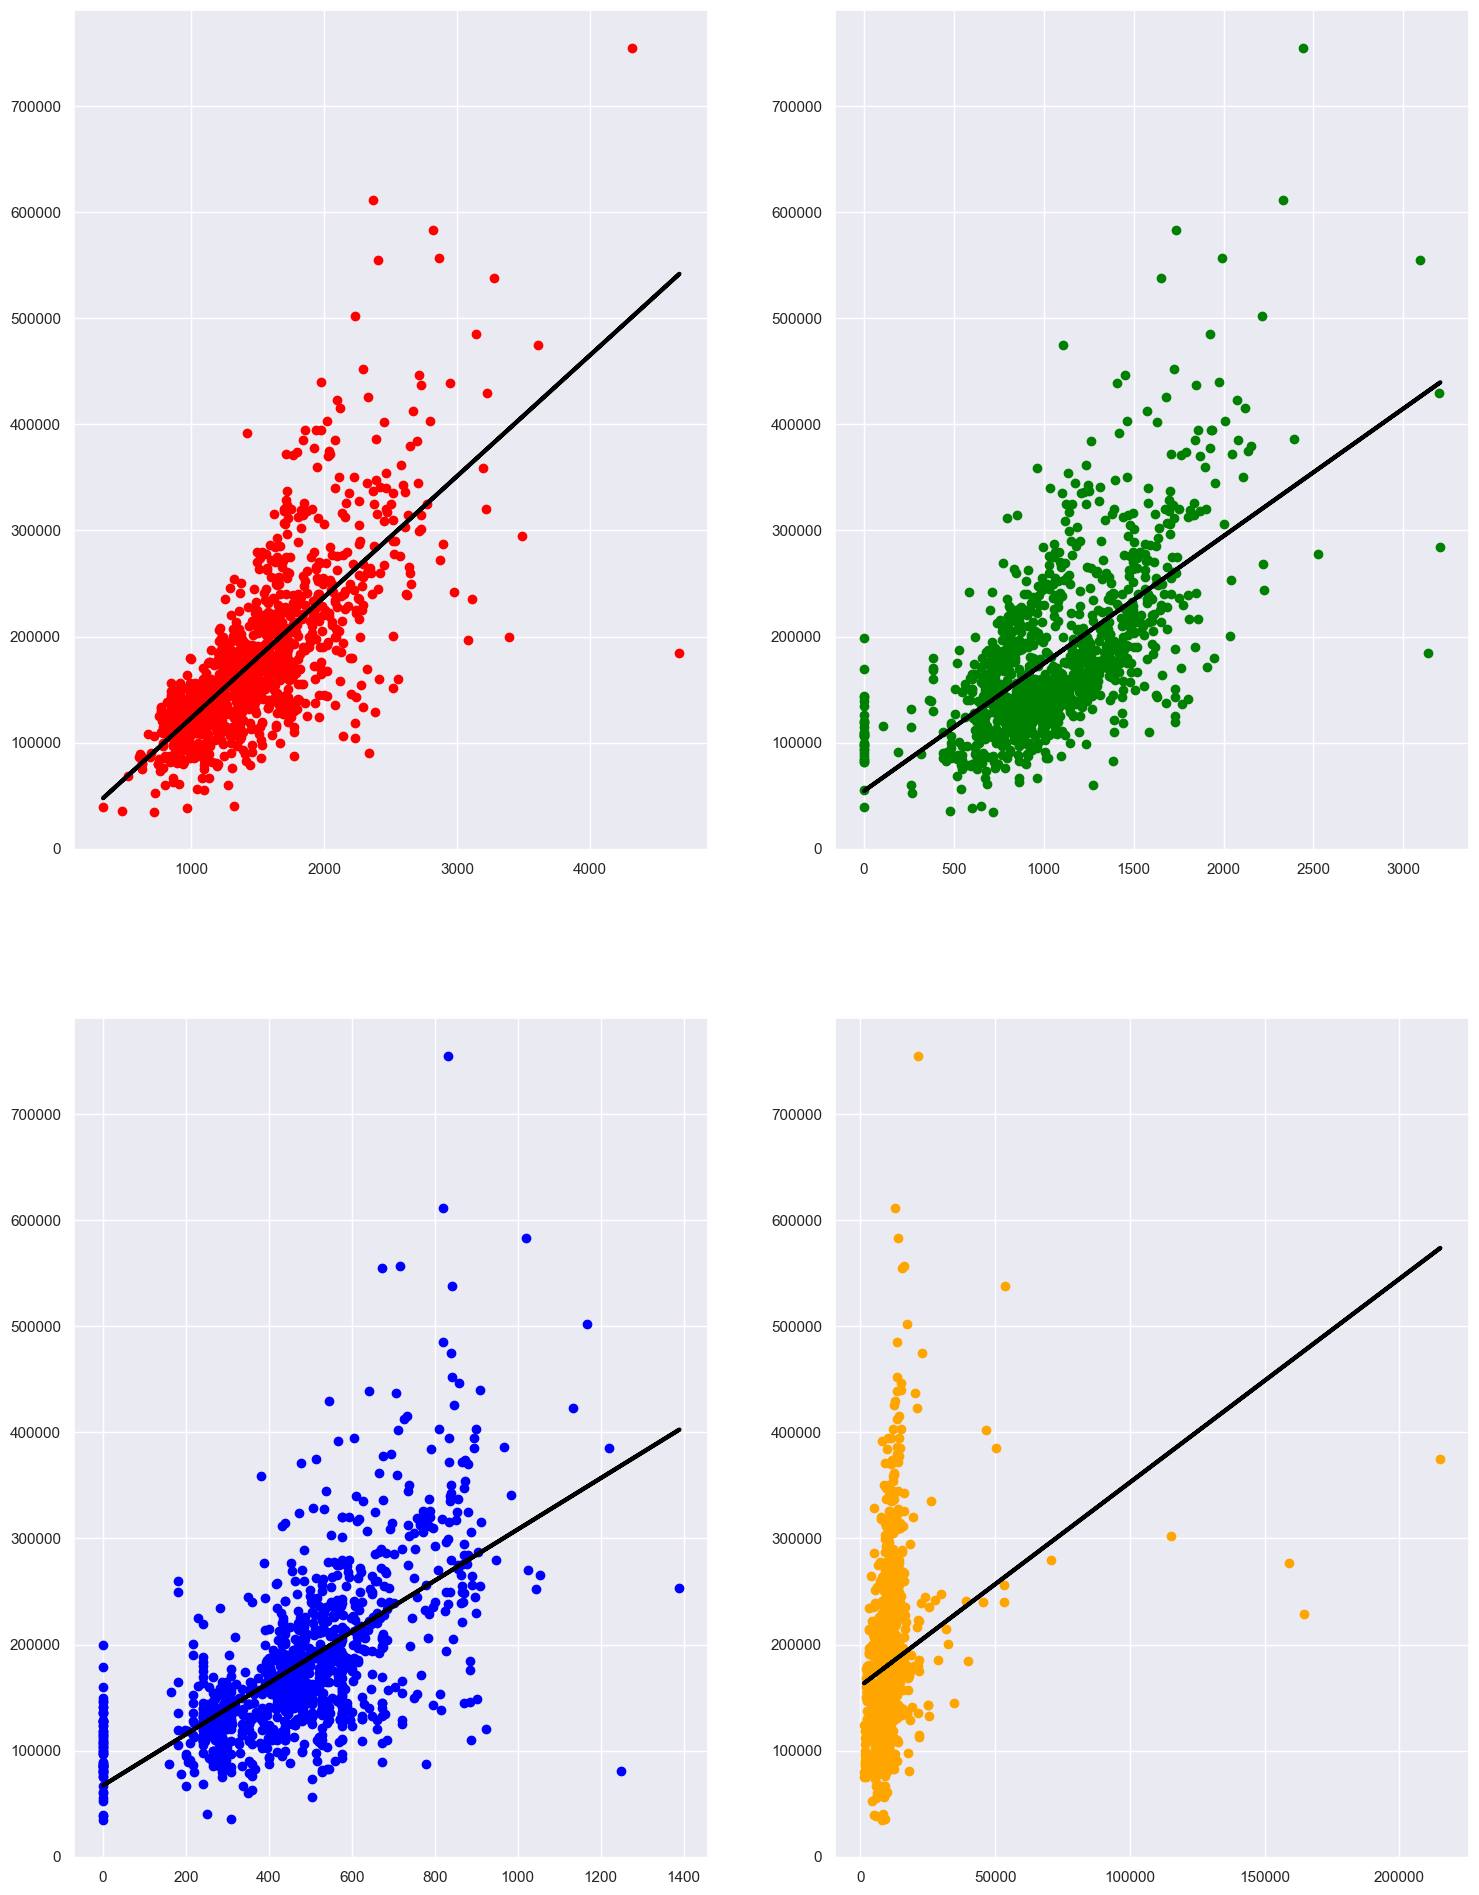

In [12]:
f, axes = plt.subplots(2, 2, figsize=(18, 24))

axes[0][0].scatter(houseGrLivArea_train, houseSalePrice_train, color = "red")
axes[0][0].plot(regline_xArea.to_numpy(), regline_yArea.to_numpy(), color = "black", linewidth = 3)

axes[0][1].scatter(houseTotalBsmtSF_train, houseSalePrice_train, color = "green")
axes[0][1].plot(regline_xBasement.to_numpy(), regline_yBasement.to_numpy(), color = "black", linewidth = 3)

axes[1][0].scatter(houseGarageArea_train, houseSalePrice_train, color = "blue")
axes[1][0].plot(regline_xGarage.to_numpy(), regline_yGarage.to_numpy(), color = "black", linewidth = 3)

axes[1][1].scatter(houseLotArea_train, houseSalePrice_train, color = "orange")
axes[1][1].plot(regline_xLot.to_numpy(), regline_yLot.to_numpy(), color = "black", linewidth = 3)

Predict SalePrice for the test dataset houseGrLivArea_test using the Linear Regression model, and plot the predictions on the Scatterplot of houseGrLivArea_test and houseSalePrice_test to visualize the accuracy.

In [13]:
houseGrLivArea_train_pred = linregPriceVArea.predict(houseGrLivArea_train)
houseGrLivArea_test_pred = linregPriceVArea.predict(houseGrLivArea_test)

houseTotalBsmtSF_train_pred = linregPriceVBasement.predict(houseTotalBsmtSF_train)
houseTotalBsmtSF_test_pred = linregPriceVBasement.predict(houseTotalBsmtSF_test)

houseGarageArea_train_pred = linregPriceVGarage.predict(houseGarageArea_train)
houseGarageArea_test_pred = linregPriceVGarage.predict(houseGarageArea_test)

houseLotArea_train_pred = linregPriceVLot.predict(houseLotArea_train)
houseLotArea_test_pred = linregPriceVLot.predict(houseLotArea_test)

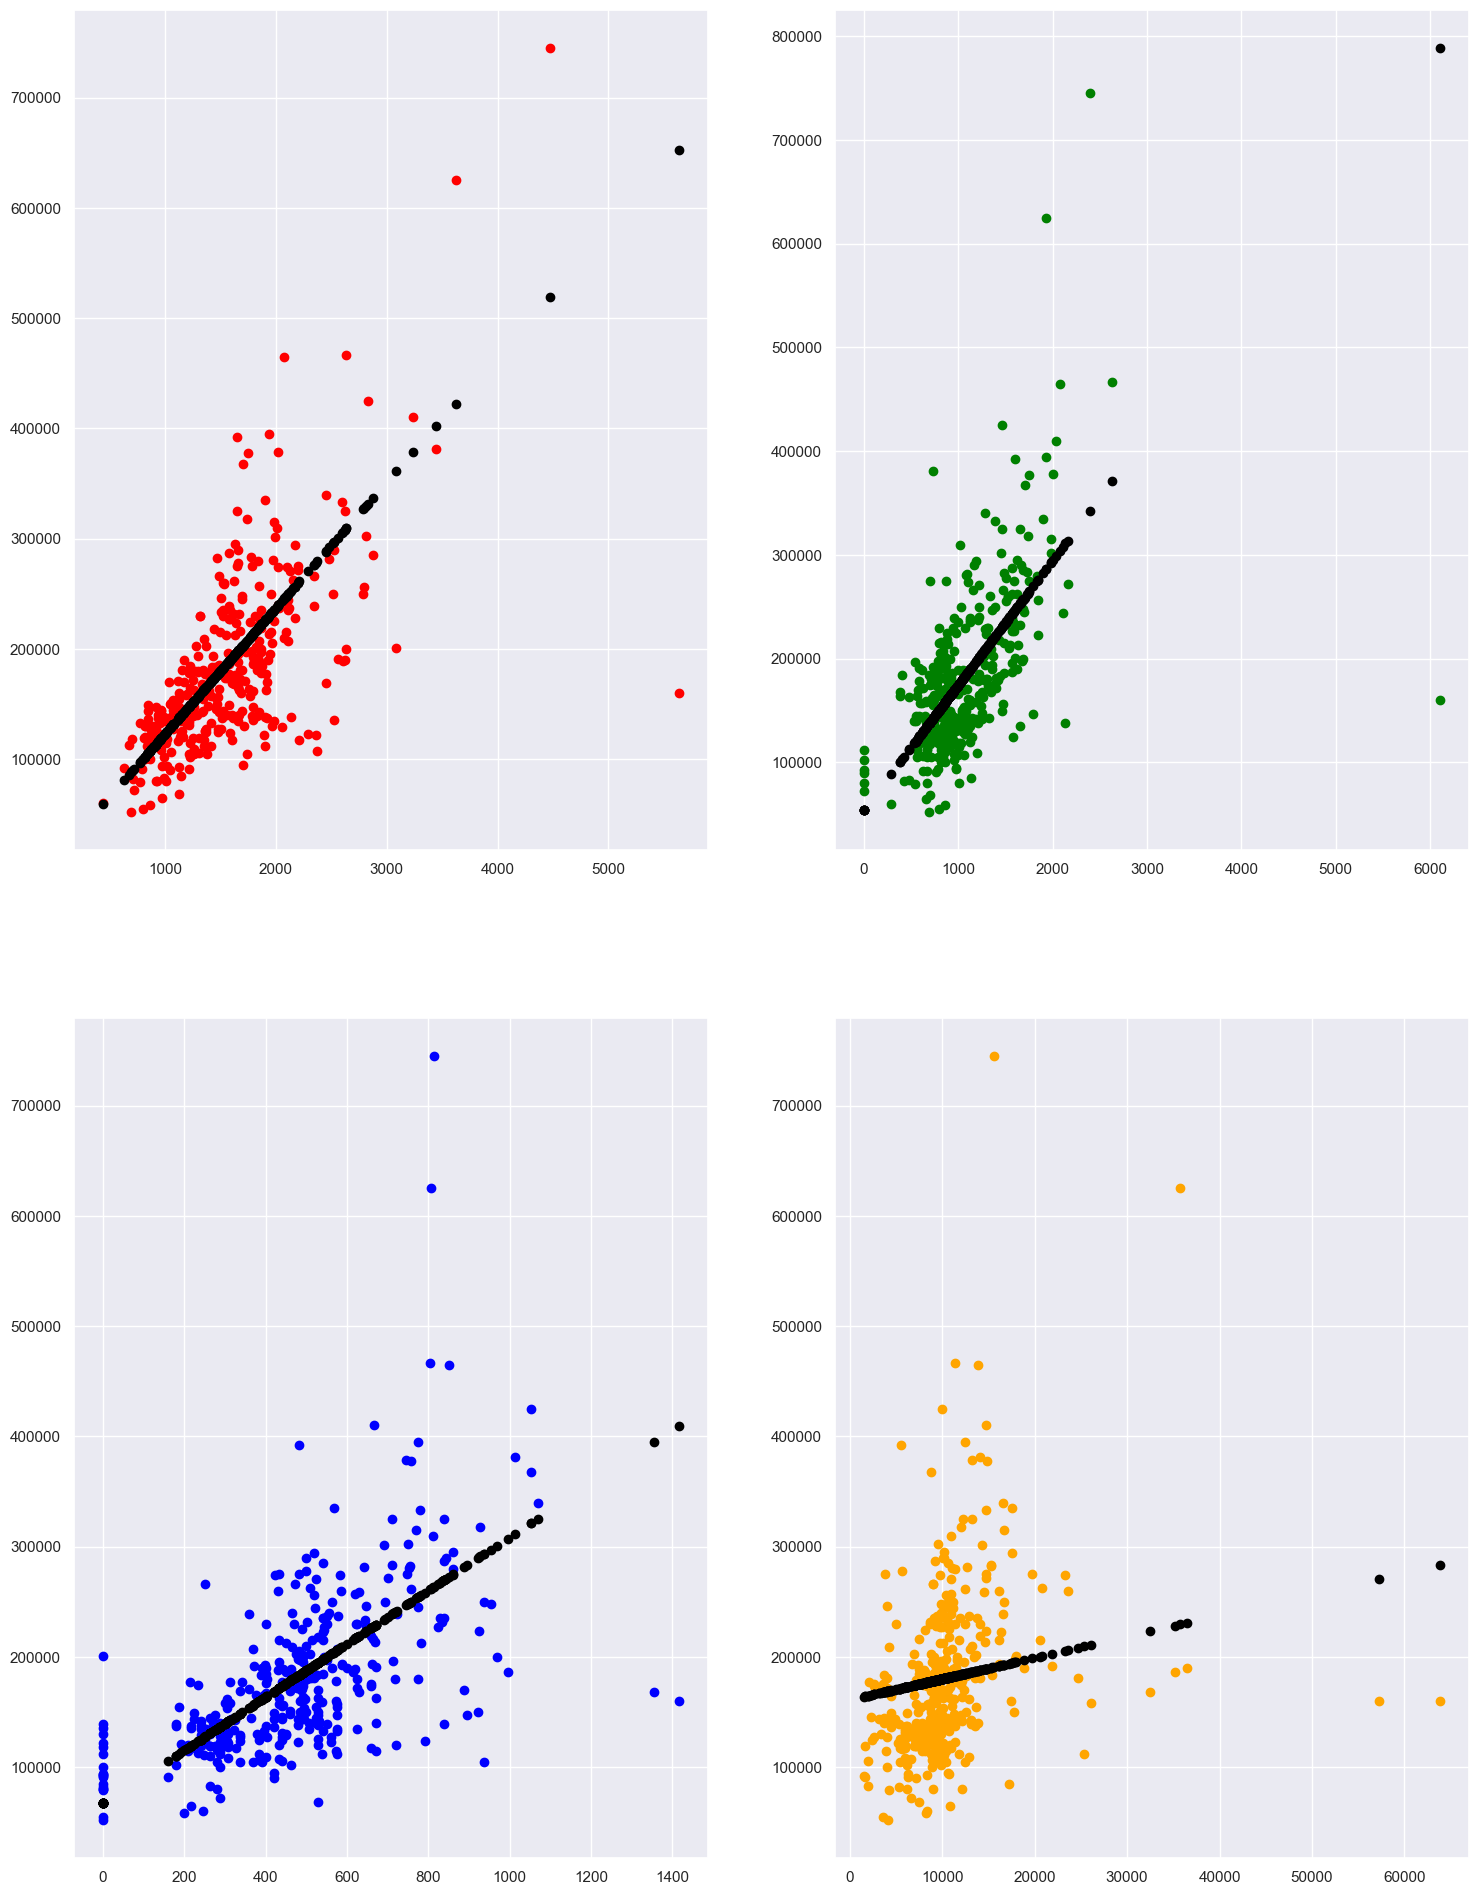

In [14]:
f, axes = plt.subplots(2, 2, figsize=(18, 24))

axes[0][0].scatter(houseGrLivArea_test, houseSalePrice_test, color = "red")
axes[0][0].scatter(houseGrLivArea_test, houseGrLivArea_test_pred, color = "black")

axes[0][1].scatter(houseTotalBsmtSF_test, houseSalePrice_test, color = "green")
axes[0][1].scatter(houseTotalBsmtSF_test, houseTotalBsmtSF_test_pred, color = "black")

axes[1][0].scatter(houseGarageArea_test, houseSalePrice_test, color = "blue")
axes[1][0].scatter(houseGarageArea_test, houseGarageArea_test_pred, color = "black")

axes[1][1].scatter(houseLotArea_test, houseSalePrice_test, color = "orange")
axes[1][1].scatter(houseLotArea_test, houseLotArea_test_pred, color = "black")

Find the Explained Variance (R^2) of the model on the Train set and on the Test set to check Goodness of Fit.

In [15]:
def mean_sq_err(actual, predicted):
    return np.mean(np.square(np.array(actual) - np.array(predicted)))

In [16]:
print("!!!Price V Area!!!")
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linregPriceVArea.score(houseGrLivArea_train, houseSalePrice_train))
mse = mean_sq_err(houseSalePrice_train, houseGrLivArea_train_pred)
print("Mean Squared Error (MSE) \t:", mse)
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse))

print("\nGoodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linregPriceVArea.score(houseGrLivArea_test, houseSalePrice_test))
mse = mean_sq_err(houseSalePrice_test, houseGrLivArea_test_pred)
print("Mean Squared Error (MSE) \t:", mse)
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse))



print("\n\n\n!!!Price V Basement!!!")
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linregPriceVBasement.score(houseTotalBsmtSF_train, houseSalePrice_train))
mse = mean_sq_err(houseSalePrice_train, houseTotalBsmtSF_train_pred)
print("Mean Squared Error (MSE) \t:", mse)
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse))

print("\nGoodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linregPriceVBasement.score(houseTotalBsmtSF_test, houseSalePrice_test))
mse = mean_sq_err(houseSalePrice_test, houseTotalBsmtSF_test_pred)
print("Mean Squared Error (MSE) \t:", mse)
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse))



print("\n\n\n!!!Price V Garage!!!")
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linregPriceVGarage.score(houseGarageArea_train, houseSalePrice_train))
mse = mean_sq_err(houseSalePrice_train, houseGarageArea_train_pred)
print("Mean Squared Error (MSE) \t:", mse)
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse))

print("\nGoodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linregPriceVGarage.score(houseGarageArea_test, houseSalePrice_test))
mse = mean_sq_err(houseSalePrice_test, houseGarageArea_test_pred)
print("Mean Squared Error (MSE) \t:", mse)
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse))



print("\n\n\n!!!Price V Lot!!!")
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linregPriceVLot.score(houseLotArea_train, houseSalePrice_train))
mse = mean_sq_err(houseSalePrice_train, houseLotArea_train_pred)
print("Mean Squared Error (MSE) \t:", mse)
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse))

print("\nGoodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linregPriceVLot.score(houseLotArea_test, houseSalePrice_test))
mse = mean_sq_err(houseSalePrice_test, houseLotArea_test_pred)
print("Mean Squared Error (MSE) \t:", mse)
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse))

!!!Price V Area!!!
Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.5317704755454566
Mean Squared Error (MSE) 	: 2962940662.7214036
Root Mean Squared Error (RMSE) 	: 54432.90055399771

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.4011772000692575
Mean Squared Error (MSE) 	: 3737081522.2960925
Root Mean Squared Error (RMSE) 	: 61131.67364219707



!!!Price V Basement!!!
Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.4096515413342241
Mean Squared Error (MSE) 	: 3735705165.951247
Root Mean Squared Error (RMSE) 	: 61120.41529596512

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.26305378699344173
Mean Squared Error (MSE) 	: 4599070168.790181
Root Mean Squared Error (RMSE) 	: 67816.4446781913



!!!Price V Garage!!!
Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.4052658994757936
Mean Squared Error (MSE) 	: 3763457359.94118
Root Mean Squared Error (RMSE) 	: 61347.02405122175

Good